# REACTION NETWORKS AS DYNAMICAL SYSTEMS

# Running Tellurium in Colab.

In [1]:
!apt-get install libncurses5
!pip install -q tellurium==2.2.8

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libncurses5 is already the newest version (6.3-2ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


You have to **restart the runtime any time you replace an old version of a package with a new version**, and we just replaced the old version of numpy with a newer one. You restart the runtime by ``Runtime>Restart and run all``

Run the following to handle legacy versions.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tellurium as te

# A Simple Example

A first model. $S_1 \leftrightarrow S_2$ using *mass action* with the kinetic constant $k_1$ in the forward direction and the constant $k_2$ in the reverse direction.

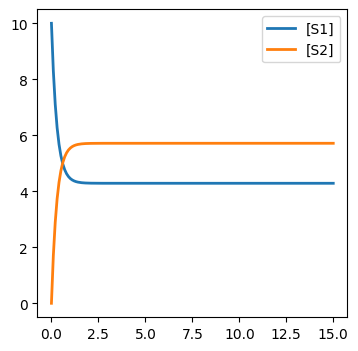

In [7]:
model1 = """
S1 -> S2; k1*S1
S2 -> S1; k2*S2

S1 = 10
k1 = 2
S2 = 0
k2 = 1.5
"""
rr1 = te.loada(model1)
start = 0
end = 15
num_points = 10*(end-start)
data = rr1.simulate(start, end, num_points)
rr1.plot(figsize=(4,4))

Write a differential equation that describes this reaction network.
* State variables: $S_1$, $S_2$

\begin{eqnarray}
\frac{d S_1}{dt} & = & k_r S_2 - k_f S_1 \\
\frac{d S_2}{dt} & = & -k_r S_2 + k_f S_1  \\
\end{eqnarray}

# Simplifying by using Conservation Rules

# Effect of Stoichiometry

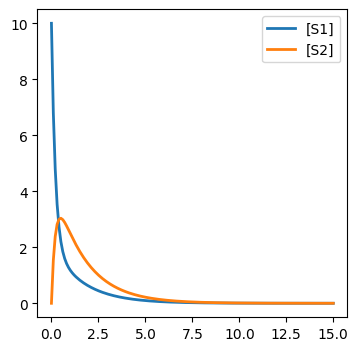

In [10]:
model2 = """
 S1 ->  2 S2; k1*S1
S2 -> S1; k2*S2

S1 = 10
k1 = 2
S2 = 0
k2 = 1.5
"""
rr1 = te.loada(model2)
start = 0
end = 15
num_points = 10*(end-start)
data = rr1.simulate(start, end, num_points)
rr1.plot(figsize=(4,4))

# Writing Differential Equations in Antimony

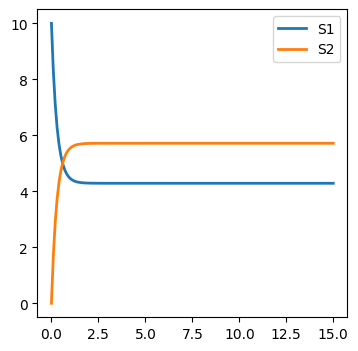

In [13]:
model2 = """
//S1 -> S2; k1*S1
//S2 -> S1; k2*S2
S1' = -k1*S1 + k2*S2
S2 := T - S1

T = 10
S1 = T
k1 = 2
k2 = 1.5
"""
rr2 = te.loada(model2)
start = 0
end = 15
num_points = 10*(end-start)
data2 = rr2.simulate(start, end, num_points, selections=["time", "S1", "S2"])
rr2.plot(figsize=(4,4))

# Comparing the model results

We want to see if the `model1` produces the same time course as `model2`.

# Fixed Species

A **fixed species** is a chemical species whose concentration does not change.**bold text**. This is indicated by a dollar sign ("$").

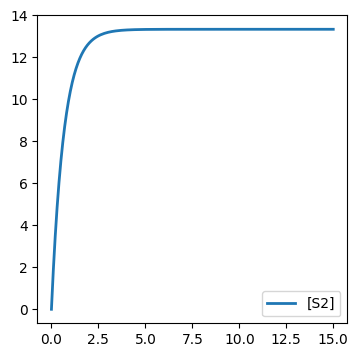

In [15]:
model1a = """
$S1 -> S2; k1*S1
S2 -> S1; k2*S2

S1 = 10
k1 = 2
S2 = 0
k2 = 1.5
"""
rr1a = te.loada(model1a)
start = 0
end = 15
num_points = 10*(end-start)
data = rr1a.simulate(start, end, num_points)
rr1a.plot(figsize=(4,4))

What are the differential equations for this model?

# A More Complicated Example

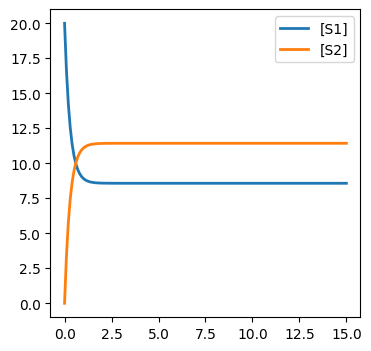

In [6]:
cmodel1 = """
S1 -> S2; k1*S1
S2 -> 2 S3; k2*S2
S3 -> S1; k3a*S3
S3 -> ; k3b*S3

S1 = 10
k1 = 2
S2 = 0
k2 = 1.5
"""
rr1 = te.loada(model1)
rr1["S1"] = 20 # change the value of a Tellurium symbol
start = 0
end = 15
num_points = 10*(end-start)
data = rr1.simulate(start, end, num_points)
rr1.plot(figsize=(4,4))